In [3]:
from transformers import BertForSequenceClassification

from transformers import BertTokenizer

In [4]:
output_dir = './model_save/'
model = BertForSequenceClassification.from_pretrained(output_dir)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [5]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load test data
df = pd.read_csv('balanced.csv')

In [6]:
df['Value'] = df['Sentiment'].apply(lambda x: 1 if 'Positive' in x else 0)

In [7]:
df.head()

,Review,Sentiment,Value
0,best candy corn on the planet ill keep this sh...,Positive,1
1,cat food my cats eat it that is all i can say ...,Positive,1
2,onions overwhelm otherwise lowkey flavor the o...,Negative,0
3,yummy tasted good spicy those that dont like s...,Positive,1
4,good flavor the product is the same as what we...,Positive,1


In [8]:
df = df.tail(1000)

In [9]:
# Tokenize test data
test_inputs = tokenizer(list(df['Review']), padding=True, truncation=True, max_length=128, return_tensors='pt')
test_labels = torch.tensor(list(df['Value']))

# Set the model to evaluation mode
model.eval()

# Predict the labels for the test data
with torch.no_grad():
    outputs = model(test_inputs['input_ids'], attention_mask=test_inputs['attention_mask'])
    predicted_labels = torch.argmax(outputs.logits, dim=1)

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

print(cm)


[[469  37]
 [ 44 450]]


In [10]:
from sklearn.metrics import f1_score

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Calculate F1-score
f1 = f1_score(test_labels, predicted_labels)

print('F1-score:', f1)


F1-score: 0.9174311926605505


In [11]:
from sklearn.metrics import precision_score

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Calculate precision
precision = precision_score(test_labels, predicted_labels)

print('Precision:', precision)


Precision: 0.9240246406570842


In [12]:
from sklearn.metrics import recall_score

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Calculate recall
recall = recall_score(test_labels, predicted_labels)

print('Recall:', recall)


Recall: 0.9109311740890689


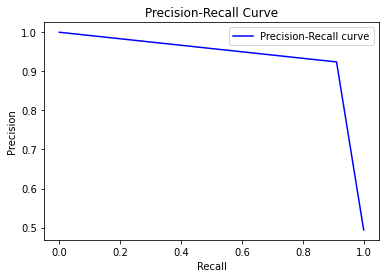

In [13]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Generate precision and recall scores
precision, recall, thresholds = precision_recall_curve(test_labels, predicted_labels)

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


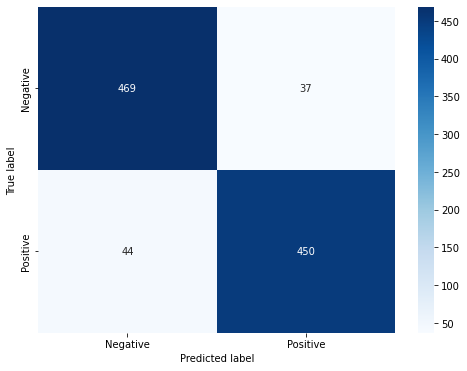

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
